### Samantha Beard
#### How would the death data in Game of Thrones be altered if there were no magic

### Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
from numpy import median, mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
import thinkstats2
import thinkplot
import random
import statsmodels.formula.api as smf

In [2]:
# read excel and load dataframe
df = pd.read_excel('game-of-thrones-deaths.xlsx')

In [3]:
df.head()

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,Series Episode
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1,1


In [4]:
# reorder columns to more logical order
df = df.iloc[:, [7, 0, 8, 9, 2, 3, 4, 5, 6, 1]]

In [5]:
df.head()

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.
0,Waymar Royce,Night's Watch,1,1,1,White Walker,None,Beyond the Wall,Ice sword,1
1,Gared,Night's Watch,1,1,1,White Walker,None,Beyond the Wall,Ice sword,2
2,Will,Night's Watch,1,1,1,Ned Stark,House Stark,Winterfell,Sword,3
3,Stag,None,1,1,1,Direwolf,None,Winterfell,Teeth,4
4,Direwolf,None,1,1,1,Stag,None,Winterfell,Antler,5


In [6]:
# update Killers House where appropriate
df['Killers House'].mask(df['Killer'] == 'White Walker', 'White Walkers', inplace=True)
df['Killers House'].mask(df['Killer'] == 'Tribesman', 'Tribesman', inplace=True)
df['Killers House'].mask(df['Killer'] == 'Hill tribesman', 'Tribesman', inplace=True)

In [7]:
# determine if death was magical method or killer
# we are assuming that if the words dragon, demon, ice, magic, or moon are used for the method that it is magical
df['Magical_Method'] = df['Method'].str.contains(pat='dragon|demon|ice|magic|moon', case=False)
df['Magical_Killer'] = df['Killers House'].str.contains(pat='White Walkers', case=False)

In [8]:
# combine magical methods and magical killers into one magical boolean column
df['Magical'] = np.where(df['Magical_Method']|df['Magical_Killer'], True, False)

In [9]:
# check that columns were added correctly
df.loc[(df['Killers House']=='White Walkers')]

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.,Magical_Method,Magical_Killer,Magical
0,Waymar Royce,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,1,True,True,True
1,Gared,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,2,True,True,True
513,Wildling,Free Folk,5,48,8,Wight,White Walkers,Hardhome,Axe,514,False,True,True
514,Wildling,Free Folk,5,48,8,Wight,White Walkers,Hardhome,Sword,515,False,True,True
515,Wildling,Free Folk,5,48,8,Wight,White Walkers,Hardhome,Sword,516,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Night's Watch brother,Night's Watch,8,70,3,Wight,White Walkers,Winterfell,Sword,1353,False,True,True
1370,Night's Watch brother,Night's Watch,8,70,3,Wight,White Walkers,Winterfell,Teeth,1350,False,True,True
1371,Night's Watch brother,Night's Watch,8,70,3,Wight,White Walkers,Winterfell,Teeth,1352,False,True,True
1372,Peasant,Smallfolk,8,70,3,Wight,White Walkers,Winterfell,Teeth,1370,False,True,True


In [10]:
df.head()

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.,Magical_Method,Magical_Killer,Magical
0,Waymar Royce,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,1,True,True,True
1,Gared,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,2,True,True,True
2,Will,Night's Watch,1,1,1,Ned Stark,House Stark,Winterfell,Sword,3,False,False,False
3,Stag,None,1,1,1,Direwolf,None,Winterfell,Teeth,4,False,False,False
4,Direwolf,None,1,1,1,Stag,None,Winterfell,Antler,5,False,False,False


In [11]:
# check to see if any one person died more than once, because that would be a magical death
# first create sub df to show duplicates
duplicate = df[df.duplicated('Name')]
# then find unique values within duplicates
duplicate.Name.unique()

array(['Tribesman', 'Stark soldier', 'Lannister soldier',
       'Stark staff member', "Robert Baratheon's illegitimate son",
       "Baratheon of Storm's End guard", 'Wildling', 'Peasant',
       'Member of the Thirteen', 'Baratheon of Dragonstone soldier',
       "Baratheon of King's Landing soldier", 'Bolton soldier',
       'Astapor slaver', 'Astapor soldier', 'Leech', 'Yunkai soldier',
       'Frey soldier', 'Dragonstone citizen', "Night's Watch mutineer",
       "Night's Watch brother", 'Prisoner', 'Thenn raider',
       'Baelish soldier', 'Pigeon', 'Dorne Soldier',
       'Second Sun Mercenary', 'Sons of the Harpy agent',
       'Unsullied Soldier', 'Great Master', 'Gladiator', 'Dothraki man',
       'Dothraki Khal', 'Child of the Forest',
       'Brotherhood Without Banners Member', 'Meereen citizen',
       'The Masters Soldier', 'Stark Soldier', "King's Landing Noble",
       'Faith Militant Brother', 'Frey family member', 'Greyjoy Soldier',
       'Horse', 'Beric Dondarrion'

In [12]:
# Does dothraki khal indicate khal drogo? this is the only one that I think may indicate a single person
# Lets search for the term Khal
df.loc[df['Name'].str.contains('Khal')]

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.,Magical_Method,Magical_Killer,Magical
56,Khal Drogo,Dothraki,1,10,10,Daenerys Targaryen,House Targaryen,Red Waste,Pillow,57,False,False,False
630,Khal Moro,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,631,False,False,False
631,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,632,False,False,False
632,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,633,False,False,False
633,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,634,False,False,False
634,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,635,False,False,False
635,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,636,False,False,False
636,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,637,False,False,False
637,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,638,False,False,False
638,Dothraki Khal,Dothraki,6,54,4,Daenerys Targaryen,House Targaryen,Vaes Dothrak,Fire,639,False,False,False


In [13]:
# based on this we can determine that Dothraki Khal does not equal Khal Drogo

In [14]:
# how many magical and non magical deaths do we have then?

In [15]:
# non-magical deaths
print(len(df[df.Magical != True]))

1149


In [16]:
# magical deaths
print(len(df[df.Magical == True]))

1075


In [17]:
# create sub-dataframes for magical and non-magical
non_mag_df = df[df.Magical != True]

In [18]:
non_mag_df.head()

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.,Magical_Method,Magical_Killer,Magical
2,Will,Night's Watch,1,1,1,Ned Stark,House Stark,Winterfell,Sword,3,False,False,False
3,Stag,None,1,1,1,Direwolf,None,Winterfell,Teeth,4,False,False,False
4,Direwolf,None,1,1,1,Stag,None,Winterfell,Antler,5,False,False,False
5,Jon Arryn,House Arryn,1,1,1,Lysa Arryn,House Arryn,King's Landing,Poison,6,False,False,False
6,Dothraki man,Dothraki,1,1,1,Dothraki man,Dothraki,Pentos,Arakh,7,False,False,False


In [19]:
mag_df = df[df.Magical == True]

In [20]:
mag_df.head()

,Name,Allegiance,Season,Series Episode,Episode,Killer,Killers House,Location,Method,Death No.,Magical_Method,Magical_Killer,Magical
0,Waymar Royce,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,1,True,True,True
1,Gared,Night's Watch,1,1,1,White Walker,White Walkers,Beyond the Wall,Ice sword,2,True,True,True
55,Rhaego,Dothraki,1,10,10,Mirri Maz Duur,None,Red Waste,Magic,56,True,False,True
77,Renly Baratheon,House Baratheon of Storm's End,2,15,5,"Melisandre ""the Red Woman"" of Asshai",Lord of Light,Storm's End,Shadow Demon,78,True,False,True
184,Pyat Pree,Warlocks of Qarth,2,20,10,Daenerys Targaryen,House Targaryen,Qarth,Dragonfire (Dragon),185,True,False,True


### Create Histograms

<AxesSubplot:xlabel='Season', ylabel='Count'>

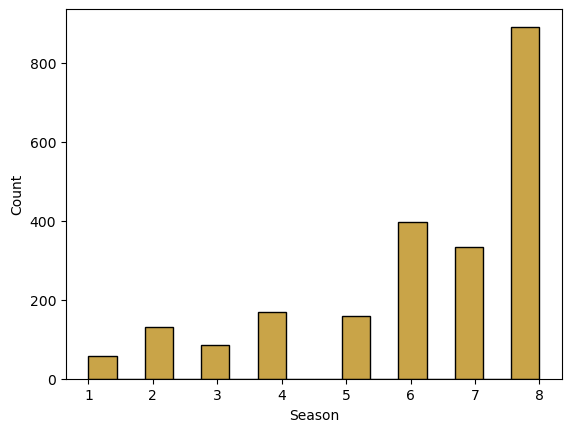

In [21]:
sns.histplot(x='Season', data=df, color='darkgoldenrod')

<AxesSubplot:xlabel='Season', ylabel='Count'>

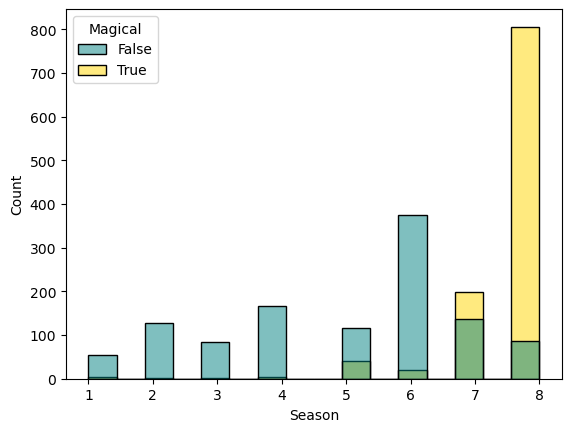

In [22]:
sns.histplot(x='Season', data=df, hue='Magical', palette=["teal", "gold"])

<AxesSubplot:xlabel='Episode', ylabel='Count'>

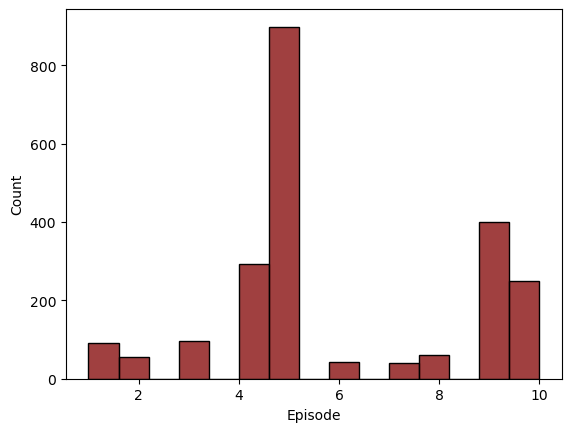

In [23]:
sns.histplot(x='Episode', data=df, color='Maroon')

<AxesSubplot:xlabel='Episode', ylabel='Count'>

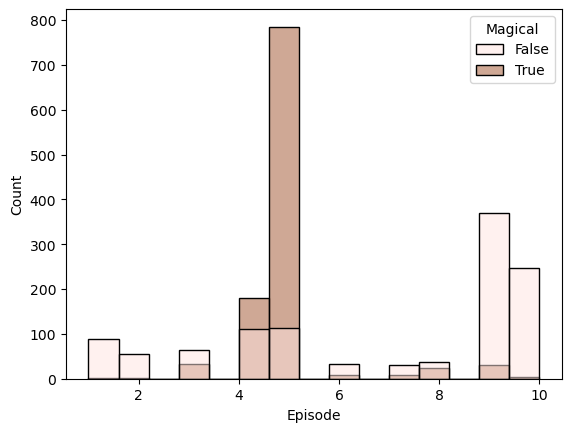

In [24]:
sns.histplot(x='Episode', data=df, hue='Magical', palette=["mistyrose", "sienna"])

In [25]:
# how many episodes in season 7
rslt_7_df = df[df['Season'] == 7] 
rslt_7_df.Episode.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [26]:
rslt_7_df['Episode'].value_counts()

4    205
1     54
2     29
3     23
7     10
6      9
5      4
Name: Episode, dtype: int64

<AxesSubplot:xlabel='Episode', ylabel='Count'>

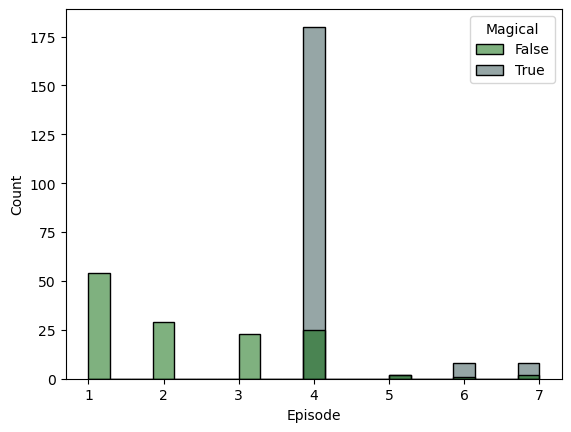

In [27]:
sns.histplot(x='Episode', data=rslt_7_df, hue='Magical', palette=["darkgreen", "darkslategrey"])

In [28]:
# how many episodes in season 8
rslt_8_df = df[df['Season'] == 8] 
rslt_8_df.Episode.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

<AxesSubplot:xlabel='Episode', ylabel='Count'>

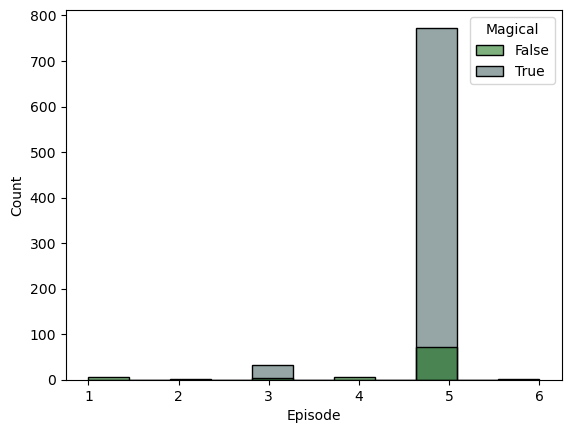

In [29]:
sns.histplot(x='Episode', data=rslt_8_df, hue='Magical', palette=["darkgreen", "darkslategrey"])

In [30]:
rslt_8_df['Episode'].value_counts()

5    844
3     35
1      6
4      5
2      1
6      1
Name: Episode, dtype: int64

In [31]:
df_killer_counts = df['Killer'].value_counts()

In [32]:
df_killer_counts

Daenerys Targaryen    1008
Cersei Lannister       199
Arya Stark              68
Wight                   54
Jon Snow                51
                      ... 
Selyse Florent           1
Olenna Tyrell            1
Walder Rivers            1
The Tickler              1
Qyburn                   1
Name: Killer, Length: 129, dtype: int64

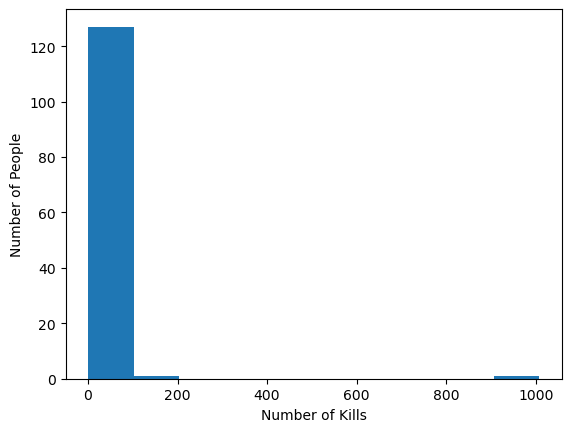

In [33]:
plt.hist(df_killer_counts)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [34]:
df_killer_counts_lessthan_100 = df_killer_counts[2:]

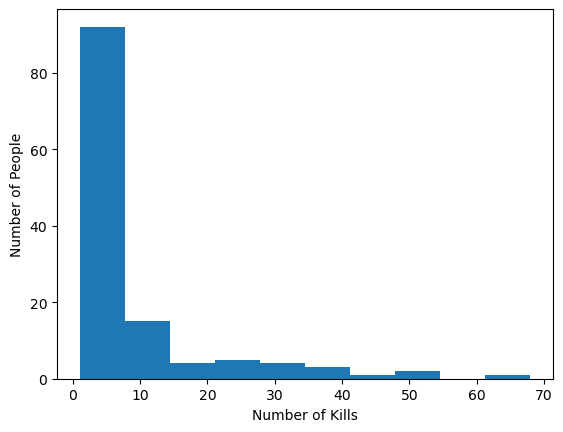

In [35]:
plt.hist(df_killer_counts_lessthan_100)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [36]:
non_mag_killer_counts = non_mag_df['Killer'].value_counts()

In [37]:
non_mag_killer_counts

Cersei Lannister         199
Arya Stark                68
Jon Snow                  51
Bolton soldier            47
Night's Watch brother     41
                        ... 
Meereen slaves             1
Hodor/Bran Stark           1
Pypar                      1
Sam Tarly                  1
Lyanna Mormont             1
Name: Killer, Length: 122, dtype: int64

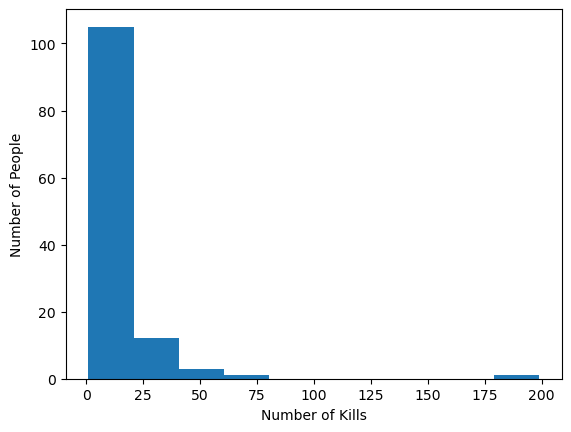

In [38]:
plt.hist(non_mag_killer_counts)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [39]:
non_mag_killer_counts_exc_cersei = non_mag_killer_counts[1:]

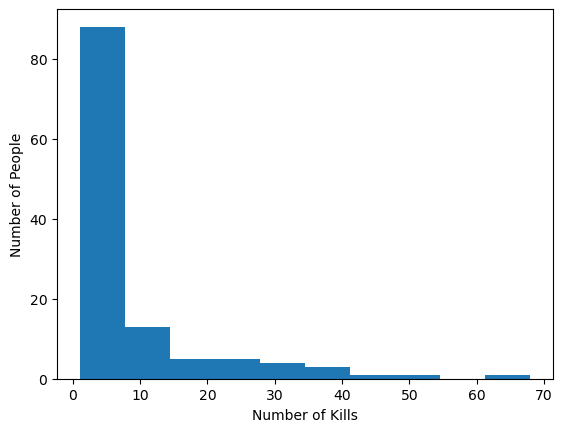

In [40]:
plt.hist(non_mag_killer_counts_exc_cersei)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [41]:
mag_killer_counts = mag_df['Killer'].value_counts()

In [42]:
mag_killer_counts

Daenerys Targaryen                      987
Wight                                    54
Viserion                                  9
Giant Wight                               8
White Walker                              6
Undead Polar Bear                         3
Night King                                2
Sandor "the Hound" Clegane                2
Mirri Maz Duur                            1
Melisandre "the Red Woman" of Asshai      1
Sam Tarly                                 1
Petyr Baelish                             1
Name: Killer, dtype: int64

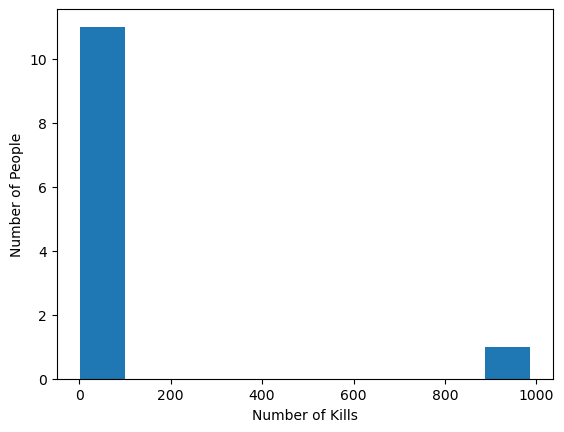

In [43]:
plt.hist(mag_killer_counts)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [44]:
mag_killer_counts_exc_Daenerys = mag_killer_counts[1:]

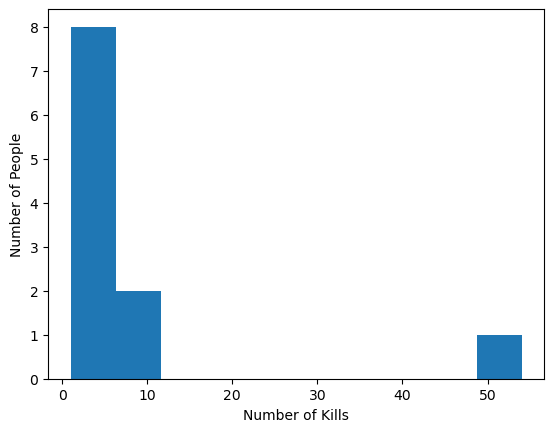

In [45]:
plt.hist(mag_killer_counts_exc_Daenerys)
plt.xlabel('Number of Kills')
plt.ylabel('Number of People')
plt.show()

In [46]:
df_weapon_counts = df['Method'].value_counts()

In [47]:
df_weapon_counts

Dragonfire (Dragon)    986
Sword                  322
Wildfire               210
Knife                  119
Arrow                   95
                      ... 
Nail                     1
Bludgeon                 1
Moon Door                1
Hanging                  1
Illness                  1
Name: Method, Length: 67, dtype: int64

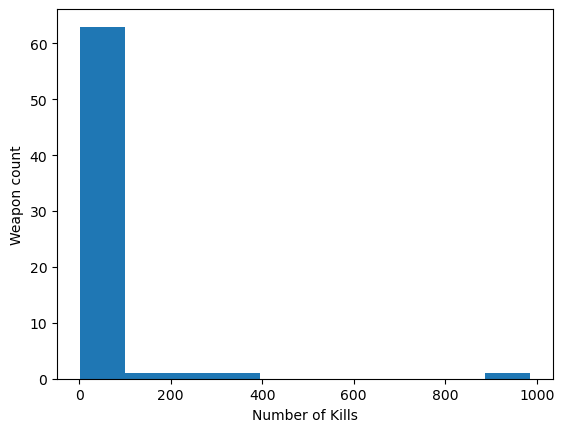

In [48]:
plt.hist(df_weapon_counts)
plt.xlabel('Number of Kills')
plt.ylabel('Weapon count')
plt.show()

In [49]:
df_weapon_counts_lessthan_100 = df_weapon_counts[4:]

In [50]:
df_weapon_counts_lessthan_100[0:20]

Arrow            95
Spear            81
Poison           63
Axe              48
Arakh            44
Flaming arrow    35
Fire             29
Hands            23
Teeth            20
Falling          18
Unknown          14
Scythe            9
Burning oil       8
Noose             8
Barrel            7
Giant arrow       7
Club              7
Hammer            4
Flaying           4
Catapult          3
Name: Method, dtype: int64

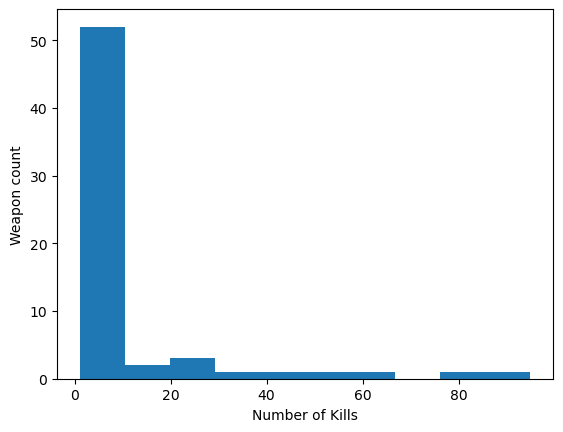

In [51]:
plt.hist(df_weapon_counts_lessthan_100)
plt.xlabel('Number of Kills')
plt.ylabel('Weapon count')
plt.show()

In [52]:
df_weapon_counts_lessthan_10 = df_weapon_counts_lessthan_100[11:]

In [53]:
df_weapon_counts_lessthan_10

Scythe               9
Burning oil          8
Noose                8
Barrel               7
Giant arrow          7
Club                 7
Hammer               4
Flaying              4
Catapult             3
Mace                 3
Boulder              3
Claws                3
Dogs                 3
Teeth (Dragon)       2
Claws (Dragon)       2
Old Age              2
Cooking              2
Rock                 2
Ice sword            2
Rubble               2
Sealed into vault    2
Shield               2
Broken foot          1
Starvation           1
Antler               1
Steak                1
Ice Javelin          1
Drowning             1
Bolo                 1
Whip                 1
Molten gold          1
Bell                 1
Tusk                 1
Magic                1
Rope                 1
Pillow               1
Mallet               1
Dragonglass          1
Water                1
Rat                  1
Hands/Necklace       1
Shadow Demon         1
Mammoth foot         1
Poison dart

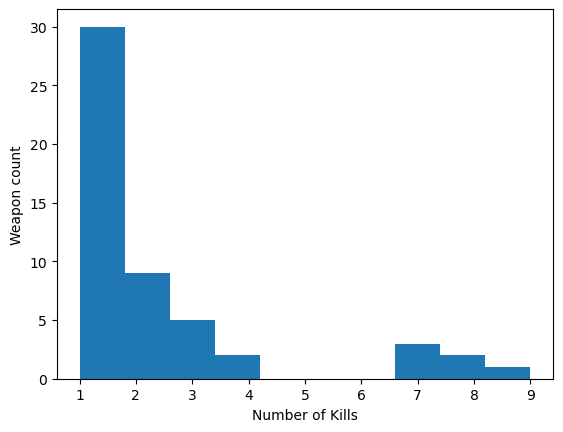

In [54]:
plt.hist(df_weapon_counts_lessthan_10)
plt.xlabel('Number of Kills')
plt.ylabel('Weapon count')
plt.show()

<AxesSubplot:xlabel='Count', ylabel='Killers House'>

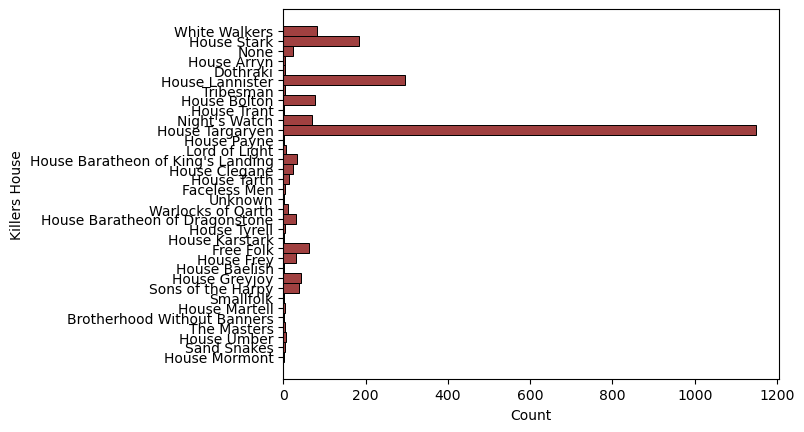

In [55]:
sns.histplot(y='Killers House', data=df, color='Maroon')

In [56]:
df_killers_house_counts = df['Killers House'].value_counts()

In [57]:
df_killers_house_counts

House Targaryen                      1148
House Lannister                       296
House Stark                           184
White Walkers                          81
House Bolton                           76
Night's Watch                          69
Free Folk                              62
House Greyjoy                          44
Sons of the Harpy                      38
House Baratheon of King's Landing      34
House Baratheon of Dragonstone         32
House Frey                             30
None                                   24
House Clegane                          23
House Tarth                            14
Warlocks of Qarth                      11
Lord of Light                           7
House Umber                             7
House Martell                           5
House Tyrell                            5
House Arryn                             5
Dothraki                                4
Tribesman                               4
Faceless Men                      

In [58]:
# drop Allegiances with only one death
df2 = df[df['Allegiance'].map(df['Allegiance'].value_counts()) > 1]

<AxesSubplot:xlabel='Count', ylabel='Allegiance'>

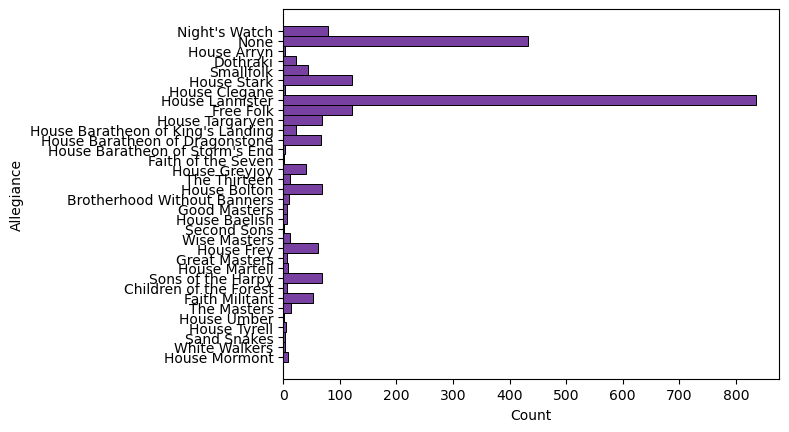

In [59]:
sns.histplot(y='Allegiance', data=df2, color='indigo')

In [60]:
victim_house_counts = df['Allegiance'].value_counts()

In [61]:
victim_house_counts

House Lannister                      835
None                                 432
House Stark                          121
Free Folk                            121
Night's Watch                         79
House Bolton                          68
Sons of the Harpy                     68
House Targaryen                       68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Mormont                          8
House Martell                          8
Good Masters                           7
House Baelish                          6
Great Masters                          6
Children of the 

In [62]:
no_allegiance_df = df[df.Allegiance == 'None']

<AxesSubplot:xlabel='Count', ylabel='Name'>

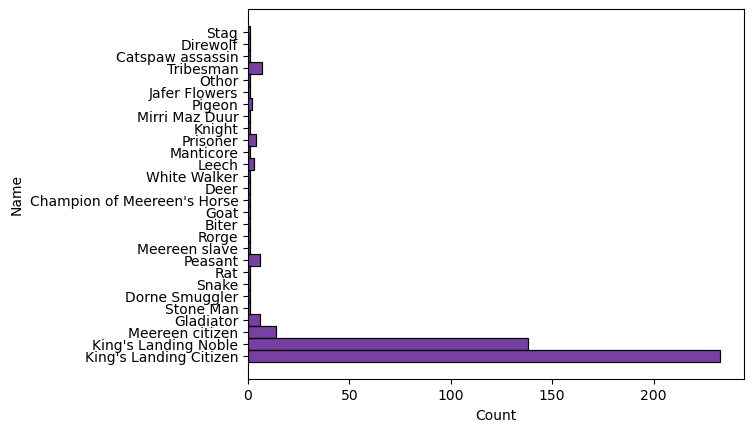

In [63]:
sns.histplot(y='Name', data=no_allegiance_df, color='indigo')

### Descriptive Characteristics

In [64]:
no_allegiance_outliers_df = df[df.Allegiance != 'None']
no_allegiance_outliers_df = no_allegiance_outliers_df[no_allegiance_outliers_df.Allegiance != 'House Lannister']
no_allegiance_outliers_df = no_allegiance_outliers_df[no_allegiance_outliers_df['Allegiance'].map
                                                      (no_allegiance_outliers_df['Allegiance'].value_counts()) > 1]

In [65]:
no_allegiance_outliers_list = no_allegiance_outliers_df['Allegiance'].value_counts()

<AxesSubplot:xlabel='Allegiance'>

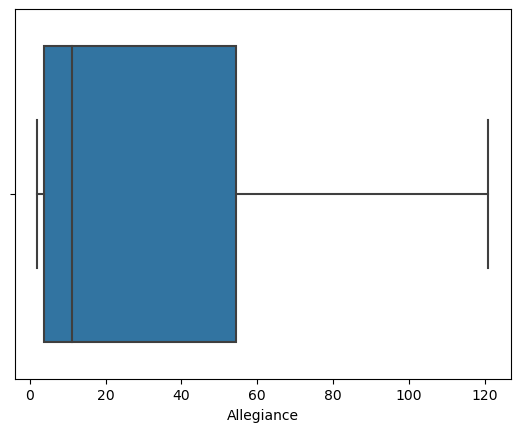

In [66]:
sns.boxplot(x=no_allegiance_outliers_list)


In [67]:
allegiance_count_list = df['Allegiance'].value_counts()

<AxesSubplot:xlabel='Allegiance'>

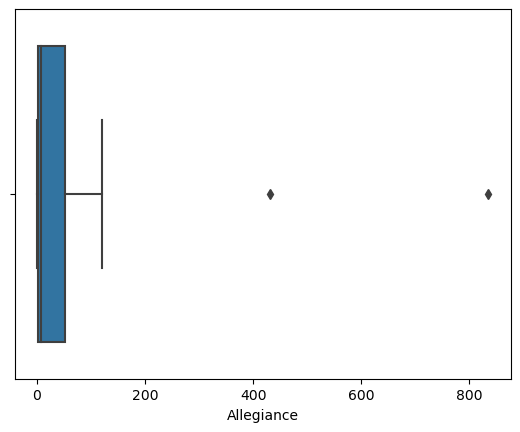

In [68]:
sns.boxplot(x=allegiance_count_list)


In [69]:
# median allegiance count with outliers
median(allegiance_count_list)

8.0

In [70]:
# median allegiance count without outliers
median(no_allegiance_outliers_list)

11.0

In [71]:
# Mean allegiance count
mean(allegiance_count_list)

54.24390243902439

In [72]:
# mean allegiance without outliers
mean(no_allegiance_outliers_list)

29.6875

In [73]:
# median killers house
median(df_killers_house_counts)

7.0

In [74]:
# mean killers house
mean(df_killers_house_counts)

65.41176470588235

<AxesSubplot:xlabel='Killers House'>

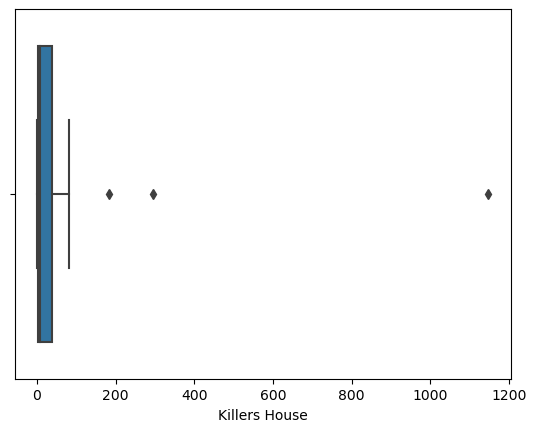

In [75]:
sns.boxplot(x=df_killers_house_counts)

In [76]:
# remove top three outliers
killers_count_not_top3 = df[df['Killers House'].map(df['Killers House'].value_counts()) < 100]

In [77]:
# turn counts into list
killers_count_not_top3_list = killers_count_not_top3['Killers House'].value_counts()

<AxesSubplot:xlabel='Killers House'>

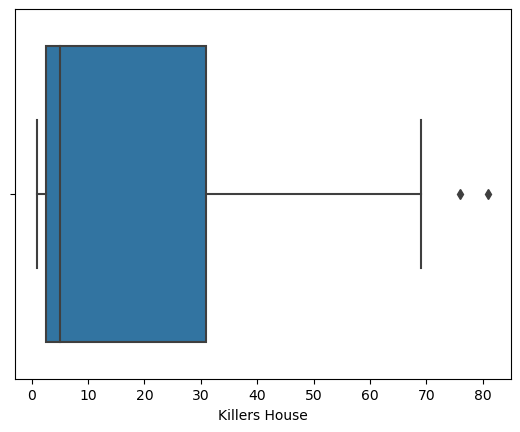

In [78]:
# box plot
sns.boxplot(x=killers_count_not_top3_list)

In [79]:
# top 3 houses counts and box plot
killers_count_top3 = df[df['Killers House'].map(df['Killers House'].value_counts()) > 100]

In [80]:
killers_count_top3_list = killers_count_top3['Killers House'].value_counts()

<AxesSubplot:xlabel='Killers House'>

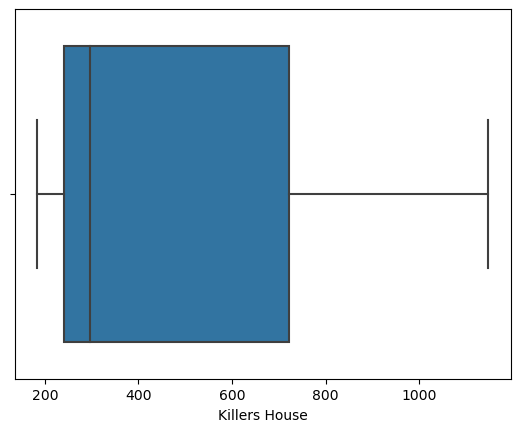

In [81]:
sns.boxplot(x=killers_count_top3_list)

In [82]:
# death count per season
deaths_per_season = df['Season'].value_counts()

In [83]:
# median deaths per season
median(deaths_per_season)

164.0

In [84]:
# mean deaths per season
mean(deaths_per_season)

278.0

<AxesSubplot:xlabel='Season'>

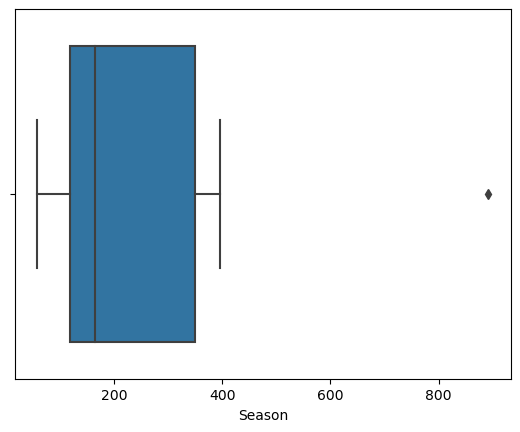

In [85]:
sns.boxplot(x=deaths_per_season)

In [86]:
# deaths per episode
deaths_per_episode = df[['Season', 'Episode']].value_counts()

In [87]:
deaths_per_episode

Season  Episode
8       5          844
7       4          205
6       10         203
        9          133
4       9           86
                  ... 
3       1            1
        2            1
4       4            1
5       6            1
8       6            1
Length: 69, dtype: int64

In [88]:
median(deaths_per_episode)

7.0

In [89]:
mean(deaths_per_episode)

32.231884057971016

<AxesSubplot:>

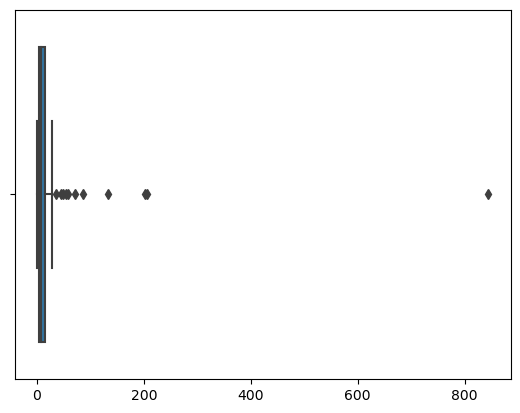

In [90]:
sns.boxplot(x=deaths_per_episode)

In [91]:
deaths_per_episode.describe()

count     69.000000
mean      32.231884
std      106.513206
min        1.000000
25%        4.000000
50%        7.000000
75%       16.000000
max      844.000000
dtype: float64

In [92]:
total_deaths = len(df)

In [93]:
844 / total_deaths

0.37949640287769787

In [94]:
# non-magical deaths per episode
non_mag_deaths_per_episode = non_mag_df[['Season', 'Episode']].value_counts()

In [95]:
median(non_mag_deaths_per_episode)

6.0

In [96]:
mean(non_mag_deaths_per_episode)

17.149253731343283

[Text(0.5, 1.0, 'Non-Magical Deaths Per Episode')]

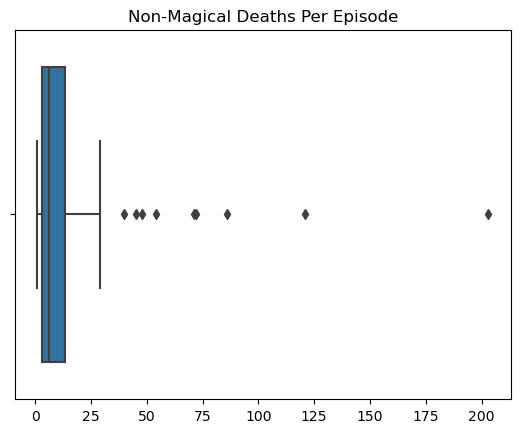

In [97]:
sns.boxplot(x=non_mag_deaths_per_episode).set(title='Non-Magical Deaths Per Episode')

In [98]:
non_mag_deaths_per_episode.describe()

count     67.000000
mean      17.149254
std       32.048852
min        1.000000
25%        3.000000
50%        6.000000
75%       13.500000
max      203.000000
dtype: float64

### PMF

In [99]:
season_pmf = thinkstats2.Pmf(df['Season'], label='actual')
season_pmf

Pmf({8: 0.4010791366906475, 6: 0.17805755395683454, 7: 0.15017985611510792, 4: 0.07643884892086332, 5: 0.0710431654676259, 2: 0.05845323741007195, 3: 0.03866906474820144, 1: 0.026079136690647483}, 'actual')

In [100]:
pmf = season_pmf.Copy()
print(pmf)
print(pmf.Total())
print('mean', pmf.Mean())

actual
0.9999999999999999
mean 6.248201438848922


In [101]:
def BiasPmf(pmf, label):
    series_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        series_pmf.Mult(x, x)
    series_pmf.Normalize()
    return series_pmf

series_pmf = BiasPmf(pmf, 'Series')
print(series_pmf)
print(series_pmf.Total())
print('mean', series_pmf.Mean())

Series
0.9999999999999999
mean 6.889176741508346


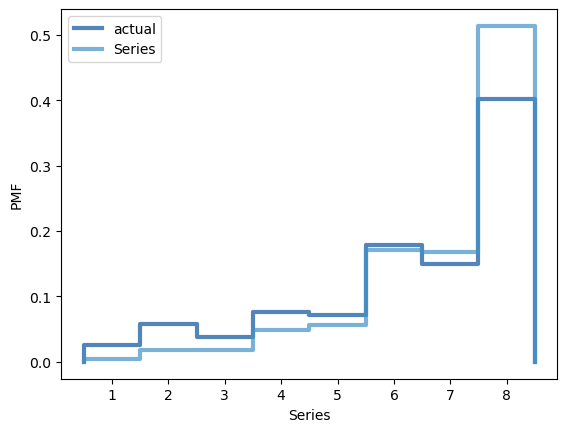

<Figure size 800x600 with 0 Axes>

In [102]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, series_pmf])
thinkplot.Show(xlabel='Series', ylabel='PMF')

### CDF

In [103]:
episode_cdf = thinkstats2.Cdf(df.Episode, label='Episode')

episode_cdf.PercentileRank(9)

88.80395683453237

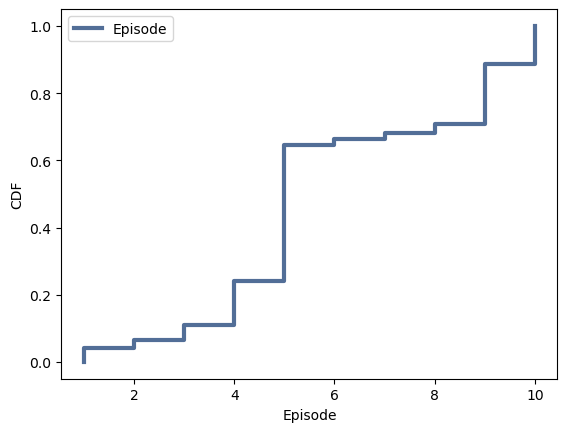

<Figure size 800x600 with 0 Axes>

In [104]:
thinkplot.cdf(episode_cdf)
thinkplot.show(xlabel = 'Episode', ylabel='CDF')

### Analytical Distribution 

In [130]:
diffs = mag_df['Series Episode'].diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

# thinkplot.Cdf(cdf)
# thinkplot.Config(xlabel="Episodes Between Madgical Deaths", ylabel="CDF")

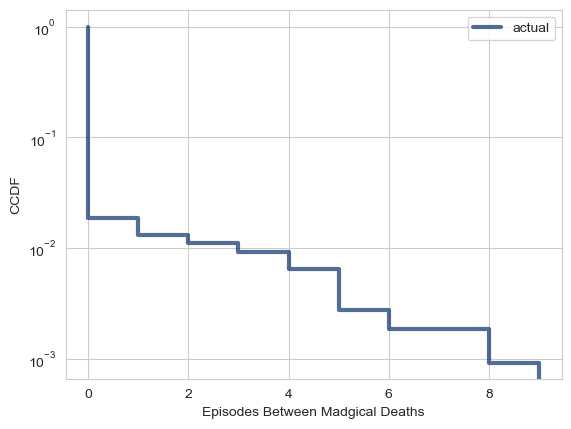

In [131]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Episodes Between Madgical Deaths",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",)

### Scatter Plots

In [105]:
# set variables for first plot
season = df['Season']
episode = df['Episode']

In [106]:
# jitter function
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [107]:
season = Jitter(season, .3)
episode = Jitter(episode, 0.3)

<AxesSubplot:xlabel='Season', ylabel='Episode'>

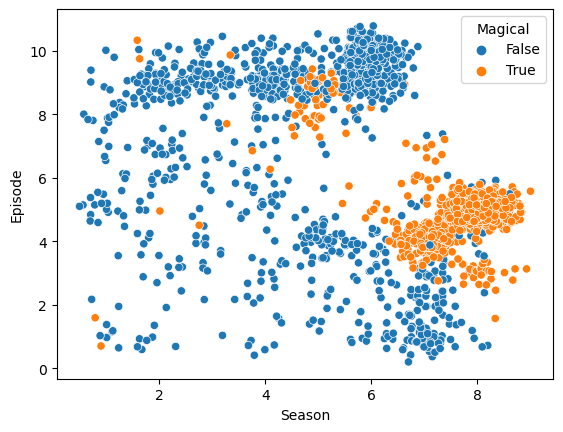

In [108]:
sns.scatterplot(x=season, y=episode, hue=df['Magical'])

In [109]:
magical_method = df['Magical_Method']
magical_killer = df['Magical_Killer']

In [110]:
magical_method = Jitter(magical_method, .1)
magical_killer = Jitter(magical_killer, .1)

<AxesSubplot:xlabel='Magical_Method', ylabel='Magical_Killer'>

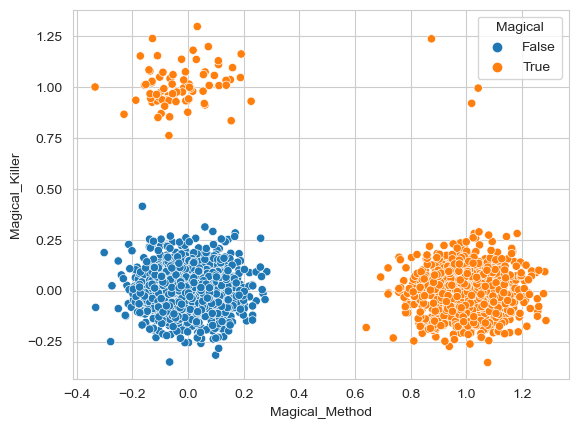

In [111]:
sns.set_style("whitegrid")
sns.scatterplot(x=magical_method, y=magical_killer, hue=df['Magical'])

### Hypothesis Test

In [112]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [113]:
class MagTest(HypothesisTest):

    def TestStatistic(self, data):
        nonMag, mag = data
        test_stat = abs(nonMag - mag)
        return test_stat

    def RunModel(self):
        nonMag, mag = self.data
        n = nonMag + mag
        sample = [random.choice('NM') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['N'], hist['M']
        return data

In [114]:
# Hypothesis Test Non-Magical vs Magical with all deaths
ct = MagTest((1149, 1075))
pvalue = ct.PValue()
pvalue

0.129

In [115]:
non_mag_df2 = non_mag_df[non_mag_df.Killer != 'Cersei Lannister']

In [116]:
len(non_mag_df2)

950

In [117]:
mag_df2 = mag_df[mag_df.Killer != 'Daenerys Targaryen']

In [118]:
len(mag_df2)

88

In [119]:
# Hypothesis Test Non-Magical vs Magical excluding Daenerys and Cersei
ct = MagTest((950, 88))
pvalue = ct.PValue()
pvalue

0.0

### Regression Analysis

In [124]:
df[["Magical_Killer", "Magical_Method", "Magical"]] = df[["Magical_Killer", "Magical_Method","Magical"]].astype(int)

In [125]:
# regression analysis based on a non-magical killer using magical methods after season 4
model = smf.ols('Magical ~ Magical_Killer==0 + Magical_Method==1 + Season>=4', data=df)
# Then I will use the fit() method, which takes the training data as arguments
results = model.fit()
# print the summary statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Magical   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.439e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:07:03   Log-Likelihood:                 4252.9
No. Observations:                2224   AIC:                            -8498.
Df Residuals:                    2220   BIC:                            -8475.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.9515      0.005    205.520      0.000       0.942       0.961
Magical_Killer == 0[T.True]    -0.9583      0.004   -231.920      0.000      -0.966      -0.950
Magical_Method == 1[T.True]     0.9919      0.002    605.103      0.000       0.989       0.995
Season >= 4[T.True]             0.0121      0.002      4.920      0.000       0.007       0.017
==============================================================================
Omnibus:                     5423.252   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40921545.139
Skew:                         -25.075   Prob(JB):                         0.00
Kurtosis:                     665.634   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""